In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [2]:
## loading Wyscout Data

folder_path = '/Users/pratikhotchandani/Downloads/Github/DataScience_Football/WyscoutData'

In [3]:
england_event_file = "/Users/pratikhotchandani/Downloads/Github/DataScience_Football/WyscoutData/events/events_England.json"
with open(england_event_file) as f:
    data = json.load(f)
    df_england_events = pd.DataFrame(data)

train = df_england_events

In [5]:
train['subEventName'].unique()

array(['Simple pass', 'High pass', 'Head pass', 'Air duel',
       'Ground loose ball duel', 'Smart pass', 'Launch',
       'Ground defending duel', 'Ground attacking duel', 'Foul',
       'Free Kick', 'Cross', 'Shot', 'Reflexes', 'Touch', 'Clearance',
       'Ball out of the field', 'Throw in', 'Goal kick', 'Corner',
       'Goalkeeper leaving line', 'Hand pass', 'Acceleration',
       'Save attempt', '', 'Free kick cross', 'Free kick shot',
       'Hand foul', 'Violent Foul', 'Protest', 'Whistle',
       'Late card foul', 'Out of game foul', 'Penalty', 'Time lost foul',
       'Simulation'], dtype=object)

In [7]:
shots = train.loc[train['subEventName'] == 'Shot']

In [8]:
shots

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280
128,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289
249,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429
...,...,...,...,...,...,...,...,...,...,...,...,...
642945,10,Shot,"[{'id': 401}, {'id': 1212}, {'id': 1802}]",8561,"[{'y': 45, 'x': 72}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,1972.969422,100,251596053
643023,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",41174,"[{'y': 33, 'x': 86}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,2193.887080,100,251596096
643051,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",7879,"[{'y': 62, 'x': 88}, {'y': 100, 'x': 100}]",2500098,Shot,1623,2H,2377.197700,100,251596357
643055,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1206}, {'id'...",145692,"[{'y': 38, 'x': 92}, {'y': 100, 'x': 100}]",2500098,Shot,1623,2H,2381.481625,100,251596359


### Now that we have all the shots, we have to create two different models

### 1. Model of headers
### 2. Model of non-headers

In [14]:
#left leg shots
header_shots = shots.loc[shots.apply (lambda x:{'id':403} in x.tags, axis = 1)]

In [15]:
header_shots

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280
640,10,Shot,"[{'id': 1901}, {'id': 403}, {'id': 201}, {'id'...",14763,"[{'y': 58, 'x': 92}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,1969.136309,100,177959853
1008,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1213}, {'id'...",26150,"[{'y': 50, 'x': 92}, {'y': 100, 'x': 100}]",2499719,Shot,1631,2H,340.664542,100,177960274
1107,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",12829,"[{'y': 54, 'x': 92}, {'y': 100, 'x': 100}]",2499719,Shot,1631,2H,634.312236,100,177960379
1309,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1212}, {'id'...",7870,"[{'y': 56, 'x': 90}, {'y': 0, 'x': 0}]",2499719,Shot,1609,2H,1346.163581,100,177960557
...,...,...,...,...,...,...,...,...,...,...,...,...
640527,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1204}, {'id'...",210044,"[{'y': 38, 'x': 95}, {'y': 0, 'x': 0}]",2500097,Shot,1624,1H,1371.188671,100,251620509
640625,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1203}, {'id'...",8653,"[{'y': 62, 'x': 93}, {'y': 100, 'x': 100}]",2500097,Shot,1631,1H,1760.720664,100,251620494
640782,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1216}, {'id'...",8653,"[{'y': 61, 'x': 96}, {'y': 100, 'x': 100}]",2500097,Shot,1631,1H,2330.151552,100,251620791
642287,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1216}, {'id'...",145692,"[{'y': 56, 'x': 93}, {'y': 100, 'x': 100}]",2500098,Shot,1623,1H,2404.202827,100,251595558


In [16]:
shots

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280
128,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289
249,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429
...,...,...,...,...,...,...,...,...,...,...,...,...
642945,10,Shot,"[{'id': 401}, {'id': 1212}, {'id': 1802}]",8561,"[{'y': 45, 'x': 72}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,1972.969422,100,251596053
643023,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",41174,"[{'y': 33, 'x': 86}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,2193.887080,100,251596096
643051,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",7879,"[{'y': 62, 'x': 88}, {'y': 100, 'x': 100}]",2500098,Shot,1623,2H,2377.197700,100,251596357
643055,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1206}, {'id'...",145692,"[{'y': 38, 'x': 92}, {'y': 100, 'x': 100}]",2500098,Shot,1623,2H,2381.481625,100,251596359


In [18]:
# Get the indices of the rows in header_shots
indices_to_drop = header_shots.index

# Create a new dataframe by dropping the rows with the specified indices from shots
non_header_shots = shots.drop(indices_to_drop)


In [19]:
non_header_shots

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247
128,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289
249,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429
394,10,Shot,"[{'id': 401}, {'id': 2101}, {'id': 1802}]",7945,"[{'y': 39, 'x': 90}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,1286.061650,100,177959606
...,...,...,...,...,...,...,...,...,...,...,...,...
642939,10,Shot,"[{'id': 401}, {'id': 2101}, {'id': 1802}]",265318,"[{'y': 40, 'x': 86}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,1933.702081,100,251596050
642945,10,Shot,"[{'id': 401}, {'id': 1212}, {'id': 1802}]",8561,"[{'y': 45, 'x': 72}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,1972.969422,100,251596053
643023,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",41174,"[{'y': 33, 'x': 86}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,2193.887080,100,251596096
643051,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",7879,"[{'y': 62, 'x': 88}, {'y': 100, 'x': 100}]",2500098,Shot,1623,2H,2377.197700,100,251596357


## 1. Xg model for Header goals

In [20]:
#get shot coordinates as separate columns
header_shots["X"] = header_shots.positions.apply(lambda cell: (100 - cell[0]['x']) * 105/100)
header_shots["Y"] = header_shots.positions.apply(lambda cell: cell[0]['y'] * 68/100)
header_shots["C"] = header_shots.positions.apply(lambda cell: abs(cell[0]['y'] - 50) * 68/100)
#calculate distance and angle
header_shots["Distance"] = np.sqrt(header_shots["X"]**2 + header_shots["C"]**2)
header_shots["Angle"] = np.where(np.arctan(7.32 * header_shots["X"] / (header_shots["X"]**2 + header_shots["C"]**2 - (7.32/2)**2)) > 0, np.arctan(7.32 * header_shots["X"] /(header_shots["X"]**2 + header_shots["C"]**2 - (7.32/2)**2)), np.arctan(7.32 * header_shots["X"] /(header_shots["X"]**2 + header_shots["C"]**2 - (7.32/2)**2)) + np.pi)
#if you ever encounter problems (like you have seen that model treats 0 as 1 and 1 as 0) while modelling - change the dependant variable to object
header_shots["Goal"] = header_shots.tags.apply(lambda x: 1 if {'id':101} in x else 0).astype(object)



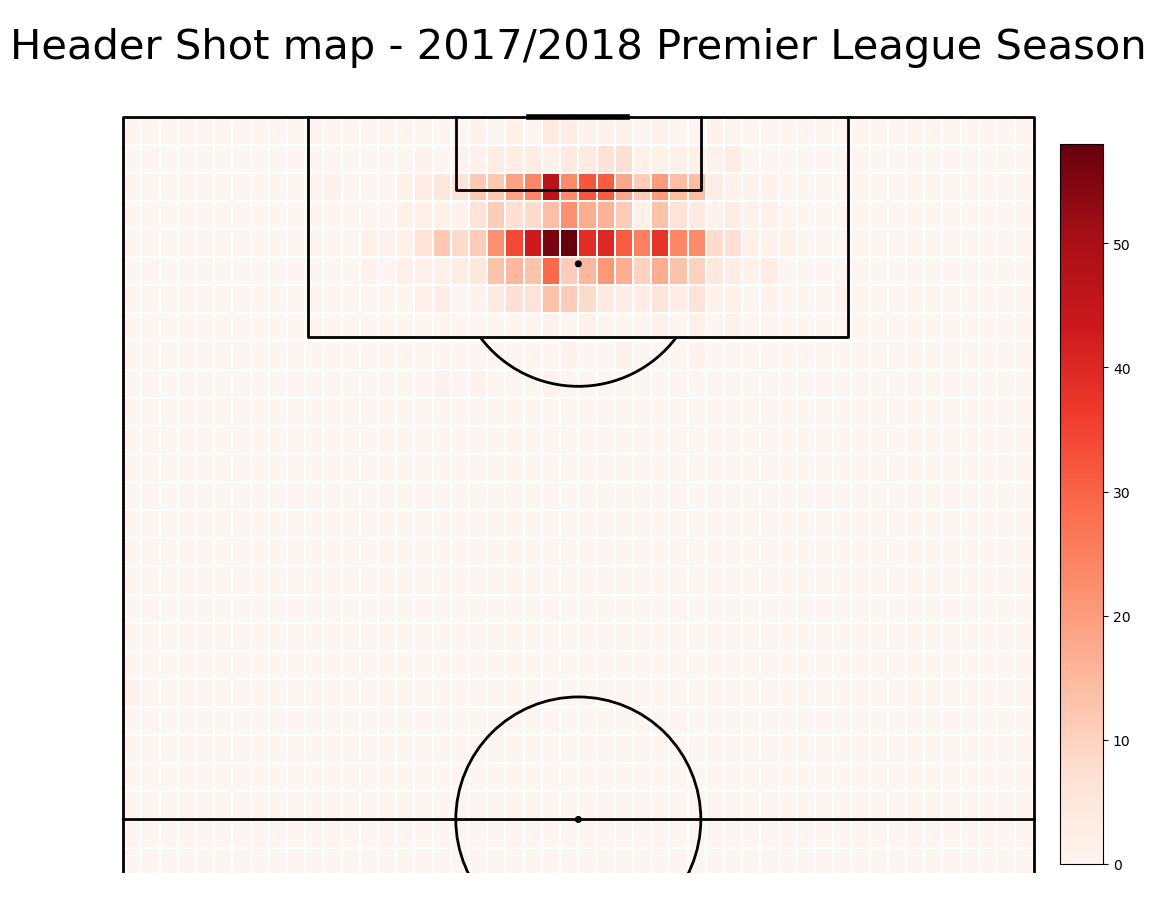

In [21]:
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#subtracting x from 105 but not y from 68 because of inverted Wyscout axis
#calculate number of shots in each bin
bin_statistic_shots = pitch.bin_statistic(105 - header_shots.X, header_shots.Y, bins=50)
#make heatmap
pcm = pitch.heatmap(bin_statistic_shots, ax=ax["pitch"], cmap='Reds', edgecolor='white', linewidth = 0.01)
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Header Shot map - 2017/2018 Premier League Season' , fontsize = 30)
plt.show()

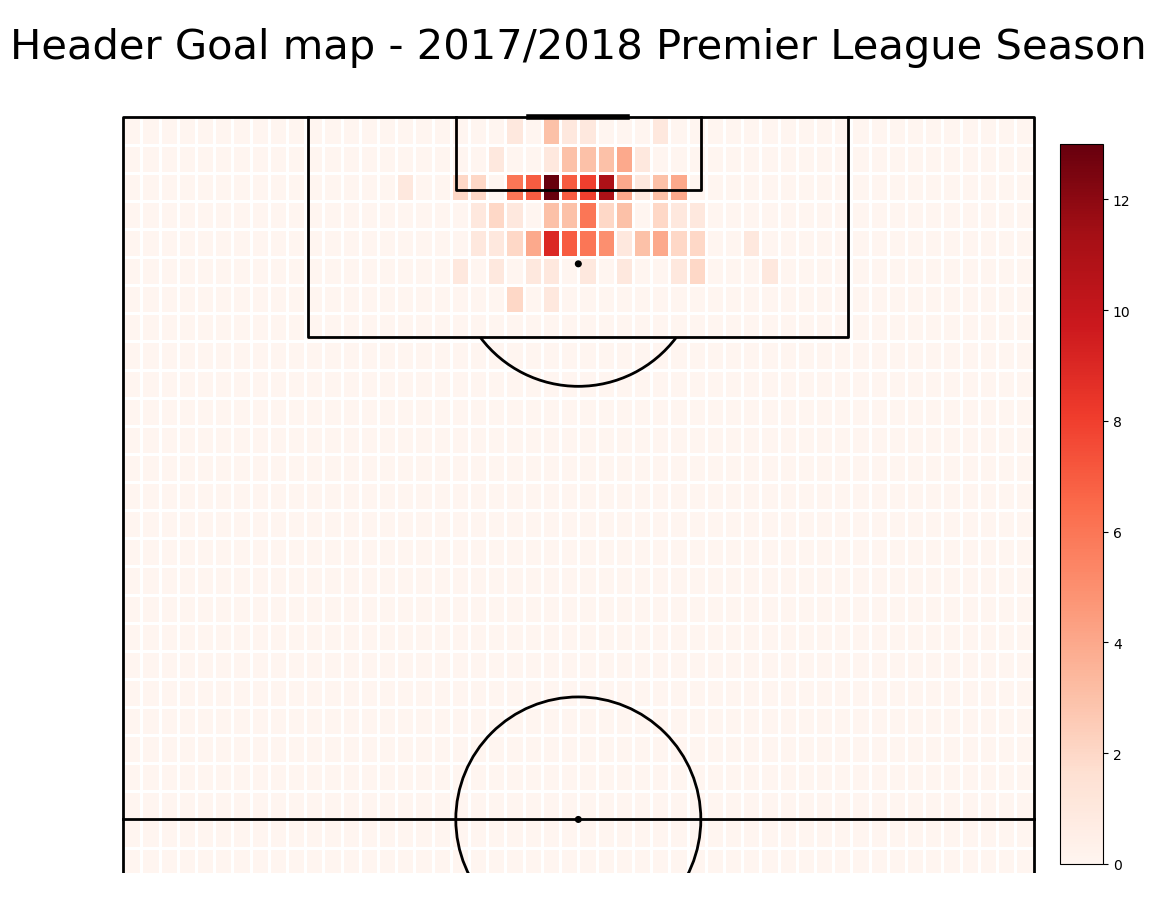

In [22]:
#take only goals
goals = header_shots.loc[header_shots["Goal"] == 1]
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#calculate number of goals in each bin
bin_statistic_goals = pitch.bin_statistic(105 - goals.X, goals.Y, bins=50)
#plot heatmap
pcm = pitch.heatmap(bin_statistic_goals, ax=ax["pitch"], cmap='Reds', edgecolor='white')
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Header Goal map - 2017/2018 Premier League Season' , fontsize = 30)
plt.show()